In [1]:
# Import relevant items
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

In [2]:
# Let's first load the data and take a look at what we have.
df = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')

In [3]:
print(df.head())
print(df.columns)

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


In [4]:
df.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

In [6]:
# #drop unneeded features
df = df.drop(['wd','station'], axis=1)

# df.columns

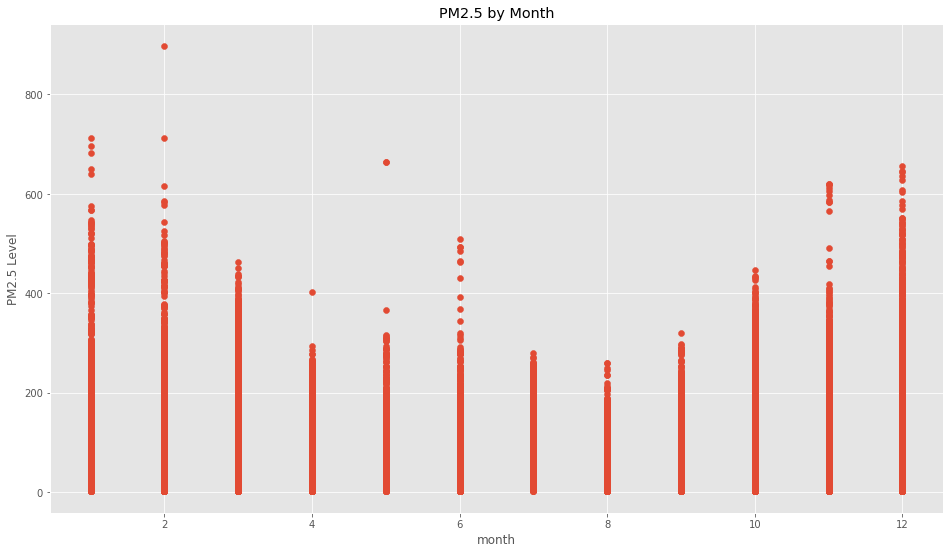

In [7]:
x = df['month']
y = df['PM2.5']
plt.scatter(x,y)
plt.xlabel('month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Month')
plt.show()

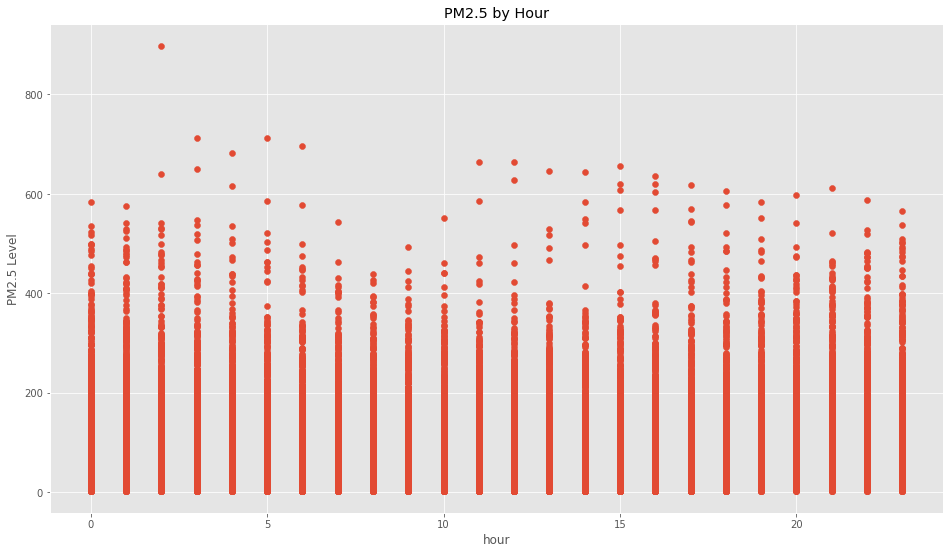

In [8]:
x = df['hour']
y = df['PM2.5']
plt.scatter(x,y)
plt.xlabel('hour')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()

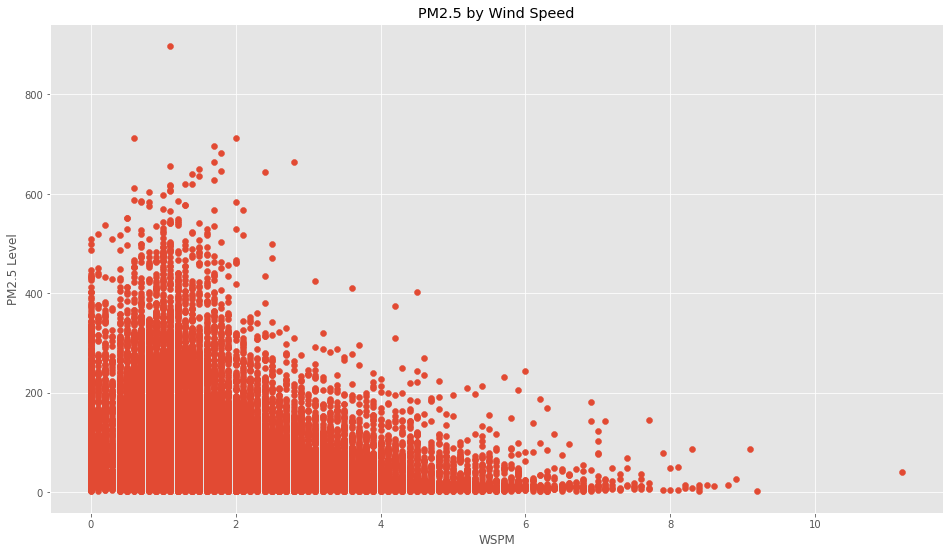

In [9]:
x = df['WSPM']
y = df['PM2.5']
plt.scatter(x,y)
plt.xlabel('WSPM')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Wind Speed')
plt.show()

In [10]:


from datetime import datetime
ps = pd.DataFrame({'year': df['year'],
                   'month': df['month'],
                   'day': df['day']})
ps = pd.to_datetime(ps)
ps = ps.to_frame(name='date')

In [11]:
df = df.join(ps)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,2.4,2017-02-28
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,0.9,2017-02-28
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,1.1,2017-02-28
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,1.2,2017-02-28


In [12]:
def time_series(start, end):
    time_series_df = df[['date', 'PM2.5']][(df['date'] >= start) & (df['date'] <= end)]
    x = time_series_df.date
    y = time_series_df['PM2.5']
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Value')
    plt.title('PM2.5 Time Series')
    return plt.show();

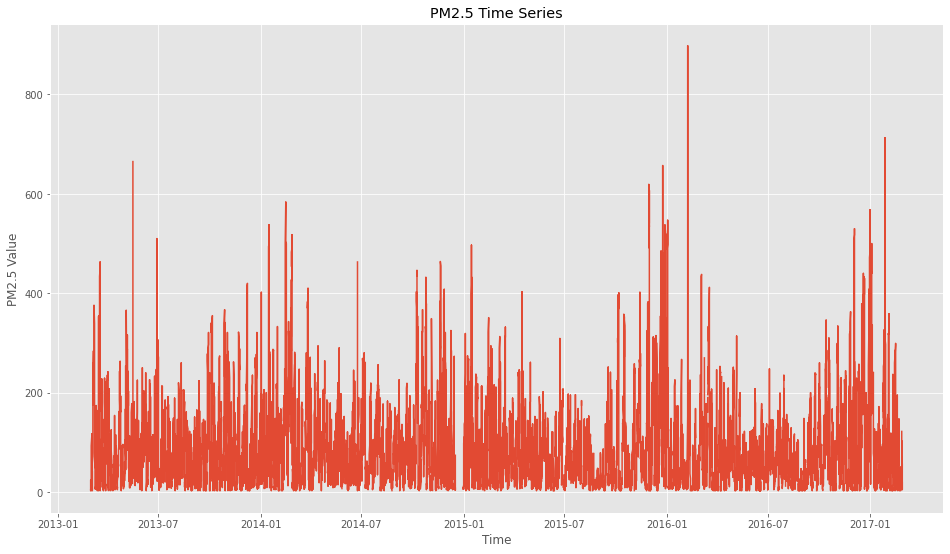

In [13]:
time_series('2013','2018')

In [14]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


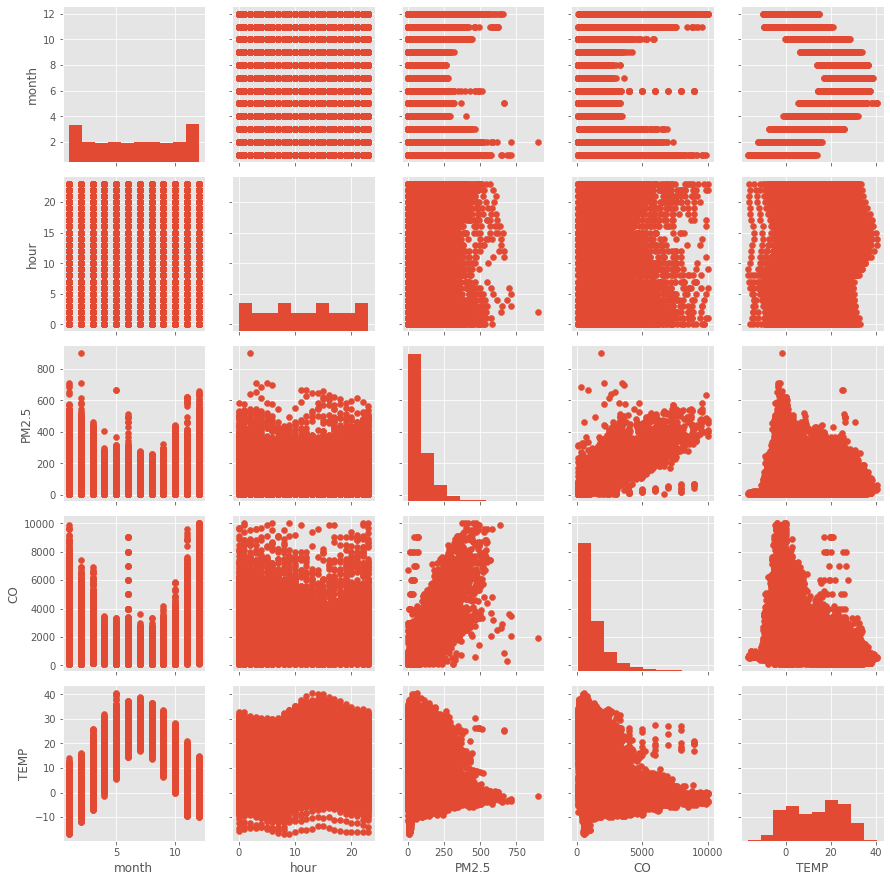

In [15]:

import seaborn as sns
g = sns.PairGrid(df, vars=["month", "hour", "PM2.5", "CO", "TEMP"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

<AxesSubplot:>

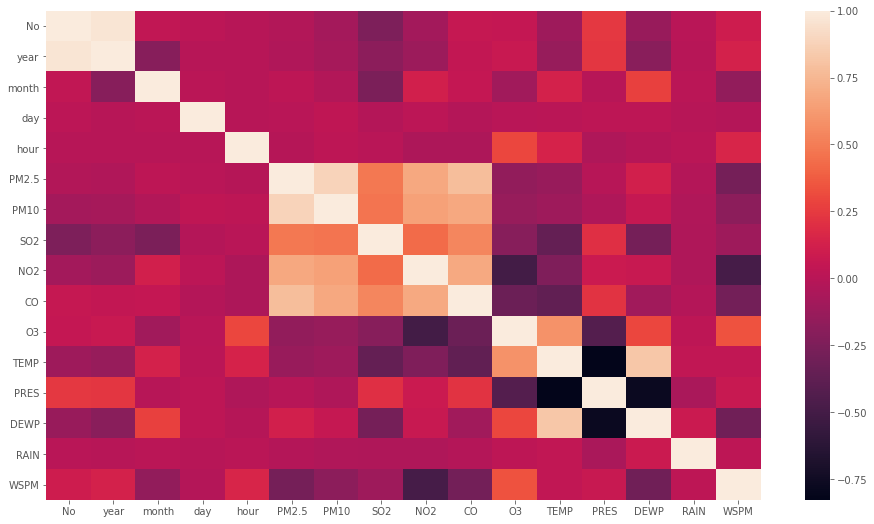

In [16]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [17]:
df.dropna(inplace=True)
df = df.drop(['date'],axis=1)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,2.4
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,0.9
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,1.1
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,1.2


## Split into Training and Test Data

In [18]:
y = df['PM2.5']

In [19]:
X = df.drop(['PM2.5'], axis=1)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [21]:
X_train.shape, y_train.shape

((22313, 15), (22313,))

In [22]:
X_test.shape, y_test.shape

((9563, 15), (9563,))

In [23]:
X.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3',
       'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'],
      dtype='object')

# Linear Regression


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

In [25]:
# Train the model using the training sets
regr.fit(X_train, y_train)


LinearRegression()

In [26]:
# Make predictions using the testing set
lin_pred = regr.predict(X_test)

In [27]:
linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.852096414026493

In [28]:
from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

Coefficients: 
 [ 2.22006838e-01 -1.94557853e+03 -1.62701571e+02 -5.44102212e+00
 -3.43254920e-01  5.17476104e-01  1.01078799e-01  1.29046703e-01
  2.06893178e-02  1.15963537e-01 -6.60553721e-01  4.23538197e-01
  1.41307015e+00 -3.12564982e-01 -1.71861559e-01]
Root mean squared error: 31.30
Mean absolute error: 20.16
R-squared: 0.85


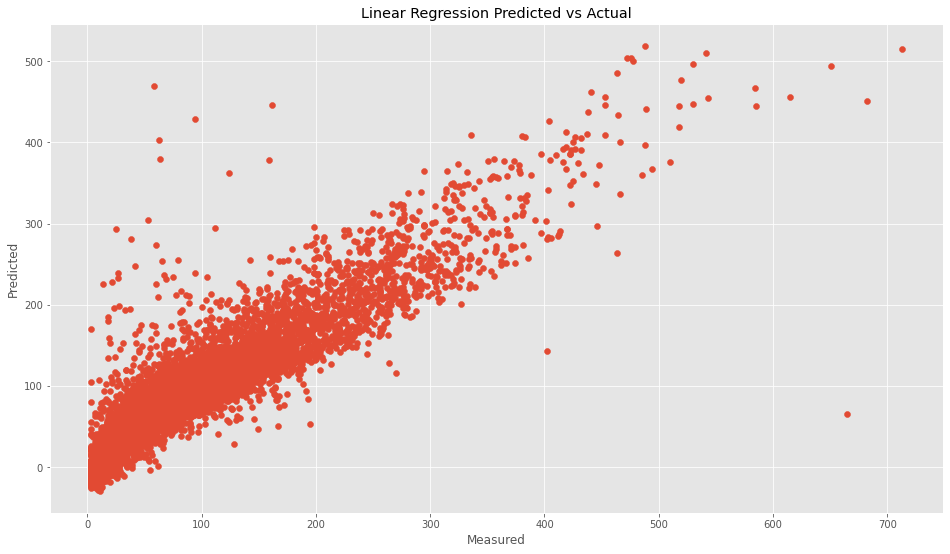

In [29]:
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

# Neural Network Regression


In [30]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

In [31]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

MLPRegressor()

In [32]:


# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score



0.9056093824402456

In [33]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [34]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

Root mean squared error: 25.01
Mean absolute error: 15.83
R-squared: 0.91


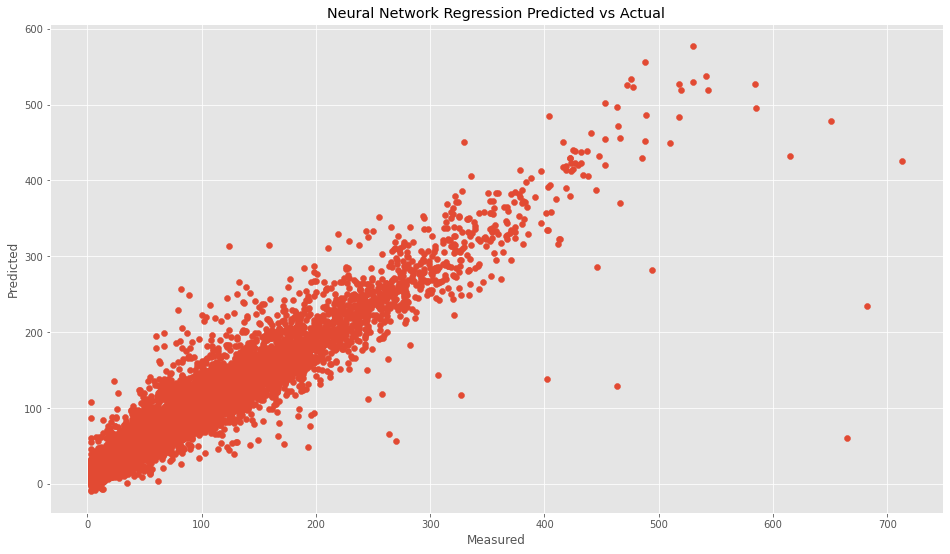

In [35]:
plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()